# Logistic Regression with a Neural Network mindset
Welcome to your first (required) programming assignment! You will build a logistic regression classifier to recognize cats. This assignment will step you through how to do this with a Neural Network mindset, and so will also hone your intuitions about deep learning.

#### Instructions:

Do not use loops (for/while) in your code, unless the instructions explicitly ask you to do so.
You will learn to:
- Build the general architecture of a learning algorithm, including:
- Initializing parameters
- Calculating the cost function and its gradient
- Using an optimization algorithm (gradient descent)
- Gather all three functions above into a main model function, in the right order.

## 1 - Packages
First, let's run the cell below to import all the packages that you will need during this assignment.
- numpy is the fundamental package for scientific computing with Python.
- h5py is a common package to interact with a dataset that is stored on an H5 file.
- matplotlib is a famous library to plot graphs in Python.
- PIL and scipy are used here to test your model with your own picture at the end.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from lr_utils import load_dataset
import scipy

## 2 - Overview of the Problem set
Problem Statement: You are given a dataset ("data.h5") containing:
- a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
- a test set of m_test images labeled as cat or non-cat
- each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

You will build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.

Let's get more familiar with the dataset. Load the data by running the following code.

In [4]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

We added "\_orig" at the end of image datasets (train and test) because we are going to preprocess them. After preprocessing, we will end up with train_set_x and test_set_x (the labels train_set_y and test_set_y don't need any preprocessing).

Each line of your train_set_x_orig and test_set_x_orig is an array representing an image. You can visualize an example by running the following code. Feel free also to change the index value and re-run to see other images.

In [5]:
train_set_x_orig.shape

(209, 64, 64, 3)

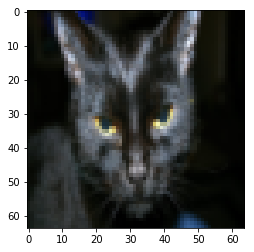

In [9]:
plt.imshow(train_set_x_orig[25, :, :, :])

### Preprocess

In [19]:
train_X = train_set_x_orig.reshape((train_set_x_orig.shape[0], -1)).T
test_X = test_set_x_orig.reshape((test_set_x_orig.shape[0], -1)).T
train_Y = train_set_y
test_Y = test_set_y

In [26]:
train_Y.shape

(1, 209)

In [18]:
train_X[0:5,0]

array([17, 31, 56, 22, 33], dtype=uint8)

One common preprocessing step in machine learning is to center and standardize your dataset, meaning that you substract the mean of the whole numpy array from each example, and then divide each example by the standard deviation of the whole numpy array. But for picture datasets, it is simpler and more convenient and works almost as well to just divide every row of the dataset by 255 (the maximum value of a pixel channel).

Let's standardize our dataset.

In [21]:
train_X = train_X / 255.
test_X = test_X /  255.

Common steps for pre-processing a new dataset are:
- Figure out the dimensions and shapes of the problem (m_train, m_test, num_px, ...)
- Reshape the datasets such that each example is now a vector of size (num_px * num_px * 3, 1)
- "Standardize" the data

## 3 - General Architecture of the learning algorithm
It's time to design a simple algorithm to distinguish cat images from non-cat images.

You will build a Logistic Regression, using a Neural Network mindset. The following Figure explains why Logistic Regression is actually a very simple Neural Network!

Key steps: In this exercise, you will carry out the following steps:
- Initialize the parameters of the model
- Learn the parameters for the model by minimizing the cost  
- Use the learned parameters to make predictions (on the test set)
- Analyse the results and conclude

## 4 - Building the parts of our algorithm
The main steps for building a Neural Network are:
- Define the model structure (such as number of input features)
- Initialize the model's parameters
- Loop:
    - Calculate current loss (forward propagation)
    - Calculate current gradient (backward propagation)
    - Update parameters (gradient descent)
    - (You often build 1-3 separately and integrate them into one function we call model().)

#### 4.1 - Helper functions
Exercise: Using your code from "Python Basics", implement sigmoid(). As you've seen in the figure above, you need to compute $sigmoid( w^T x + b)$ to make predictions.

In [104]:
sigmoid = lambda z: 1. / (1 + np.exp(- z + 1e-16))

#### 4.2 - Initializing parameters¶
Exercise: Implement parameter initialization in the cell below. You have to initialize w as a vector of zeros. If you don't know what numpy function to use, look up np.zeros() in the Numpy library's documentation.

In [24]:
def initialize_with_zeros(dim):
    return np.zeros((dim, 1)), 0

#### 4.3 - Forward and Backward propagation
Now that your parameters are initialized, you can do the "forward" and "backward" propagation steps for learning the parameters.

Exercise: Implement a function propagate() that computes the cost function and its gradient.

$$\begin{align*}
\frac{\partial}{\partial gz} J & = \frac{y - gz}{gz'} \\
\delta & = y - gz \\
\delta \frac{\partial z}{\partial w} & = X \delta^T \\
\delta \frac{\partial z}{\partial b} & = \delta \\
\end{align*}$$

#### Intuitively understanding X @ delta.T
X is a m * N tensor, delta.T is n * N tensor, then X @ delta.T is
<img src = 'images/xdeltat.png' width = '500px' />

In [71]:
def propagate(W, b, X, Y):
    
    # forward prop
    z = W.T @ X + b
    gz = sigmoid(z)
    # loss
    loss = - np.mean(Y * np.log(gz) + (1 - Y) * np.log(1 - gz))
    # back prop
    delta = gz - Y
    grad = {}
    grad['w'] = X @ delta.T / X.shape[1] # exactly, this is quite fast and intuitive
    grad['b']= np.mean(delta)
    
    return grad, loss

In [76]:
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["w"]))
print ("db = " + str(grads["b"]))
print ("cost = " + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


#### Optimization
You have initialized your parameters.
You are also able to compute a cost function and its gradient.
Now, you want to update the parameters using gradient descent.
Exercise: Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha\,d\theta$, where $\alpha$ is the learning rate.

In [78]:
def gradient_descent(params, grads, alpha):
    for k in params:
        params[k] -= 1.0 * alpha * grads[k]
    return params

In [82]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    params = {}
    params['w'] = w * 1.0
    params['b'] = b * 1.0
    
    costs = []
    
    for i in range(num_iterations):
        grad, loss = propagate(params['w'], params['b'], X, Y)
        params = gradient_descent(params, grad, learning_rate)
        if i % 100 == 0:
            costs.append(loss)
            if print_cost:
                print("Loss after {0} iterations is {1}".format(i, loss))
    
    return params, grad, costs

In [83]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["w"]))
print ("db = " + str(grads["b"]))

w = [[0.1124579 ]
 [0.23106775]]
b = 1.5593049248448891
dw = [[0.90158428]
 [1.76250842]]
db = 0.4304620716786828


Exercise: The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the predict() function. There is two steps to computing predictions:

Calculate $\hat{Y} = A = \sigma(w^T X + b)$

Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction. If you wish, you can use an if/else statement in a for loop (though there is also a way to vectorize this).

In [88]:
def predict(W, b, X, thrs = 0.5):
    output = np.zeros((1, X.shape[1]))
    output[sigmoid(W.T @ X + b) >= thrs] = 1
    return output

In [89]:
predict(w, b, X)

array([[1., 1.]])

#### 5 - Merge all functions into a model
You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

Exercise: Implement the model function. Use the following notation:
- Y_prediction for your predictions on the test set
- Y_prediction_train for your predictions on the train set
- w, costs, grads for the outputs of optimize()

In [90]:
def accuracy(yhat, y):
    return yhat[yhat == y].size / y.size

In [100]:
# GRADED FUNCTION: model

def model(train_X, train_Y, test_X, test_Y, num_iterations=2000, learning_rate=0.5, print_cost=False):
    w, b = initialize_with_zeros(train_X.shape[0])
    params, grads, costs = optimize(w, b, train_X, train_Y, num_iterations, learning_rate, print_cost) 
    
    test_pred = predict(params['w'], params['b'], test_X)
    train_pred = predict(params['w'], params['b'], train_X)
    
    print('train accuracy: {0}'.format(accuracy(train_pred, train_Y)))
    print('test accuracy: {0}'.format(accuracy(test_pred, test_Y)))
    
    output = {'costs': costs,
             'w' : params['w'],
             'b': params['b'],
             'train_acc': accuracy(train_pred, train_Y),
             'test_acc': accuracy(test_pred, test_Y)}
    return output

In [101]:
res = model(train_X, train_Y, test_X, test_Y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Loss after 0 iterations is 0.6931471805599453
Loss after 100 iterations is 0.5845083636993086
Loss after 200 iterations is 0.46694904094655476
Loss after 300 iterations is 0.37600686694802077
Loss after 400 iterations is 0.33146328932825125
Loss after 500 iterations is 0.30327306747438293
Loss after 600 iterations is 0.27987958658260487
Loss after 700 iterations is 0.2600421369258757
Loss after 800 iterations is 0.24294068467796626
Loss after 900 iterations is 0.22800422256726066
Loss after 1000 iterations is 0.2148195137844964
Loss after 1100 iterations is 0.20307819060644985
Loss after 1200 iterations is 0.19254427716706857
Loss after 1300 iterations is 0.18303333796883509
Loss after 1400 iterations is 0.17439859438448876
Loss after 1500 iterations is 0.16652139705400335
Loss after 1600 iterations is 0.15930451829756614
Loss after 1700 iterations is 0.152667324712965
Loss after 1800 iterations is 0.14654223503982342
Loss after 1900 iterations is 0.1408720757031016
train accuracy: 0.9

#### 6 - Further analysis (optional/ungraded exercise)
Congratulations on building your first image classification model. Let's analyze it further, and examine possible choices for the learning rate $\alpha$.

Choice of learning rate
Reminder: In order for Gradient Descent to work you must choose the learning rate wisely. The learning rate $\alpha$ determines how rapidly we update the parameters. If the learning rate is too large we may "overshoot" the optimal value. Similarly, if it is too small we will need too many iterations to converge to the best values. That's why it is crucial to use a well-tuned learning rate.

Let's compare the learning curve of our model with several choices of learning rates. Run the cell below. This should take about 1 minute. Feel free also to try different values than the three we have initialized the learning_rates variable to contain, and see what happens.

##### 3000 iterations

In [105]:
alpha = [0.1, 0.05, 0.01, 0.005, 0.001]
costs = []
train_acc = []
test_acc = []
for lr in alpha:
    res = model(train_X, train_Y, test_X, test_Y, num_iterations = 3000, learning_rate = lr)
    costs.append(res['costs'])
    train_acc.append(res['train_acc'])
    test_acc.append(res['test_acc'])

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


train accuracy: 1.0
test accuracy: 0.66
train accuracy: 1.0
test accuracy: 0.66
train accuracy: 1.0
test accuracy: 0.68
train accuracy: 0.9952153110047847
test accuracy: 0.68
train accuracy: 0.937799043062201
test accuracy: 0.74


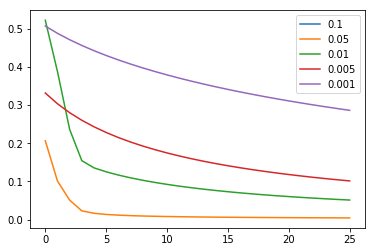

In [113]:
i = 0
for cost in costs:
    plt.plot(cost[4:], label = alpha[i])
    i += 1
plt.legend()

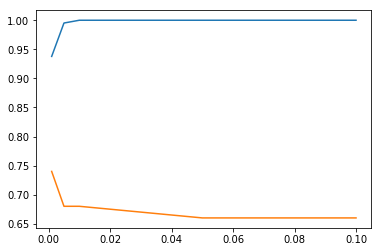

In [116]:
plt.plot(alpha, train_acc)
plt.plot(alpha, test_acc)

In [117]:
alpha = [0.1, 0.05, 0.01, 0.005, 0.001]
costs = []
train_acc = []
test_acc = []
for lr in alpha:
    res = model(train_X, train_Y, test_X, test_Y, num_iterations = 6000, learning_rate = lr)
    costs.append(res['costs'])
    train_acc.append(res['train_acc'])
    test_acc.append(res['test_acc'])

C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\ProgramData\Miniconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


train accuracy: 1.0
test accuracy: 0.64
train accuracy: 1.0
test accuracy: 0.66
train accuracy: 1.0
test accuracy: 0.7
train accuracy: 1.0
test accuracy: 0.68
train accuracy: 0.9712918660287081
test accuracy: 0.7


It's shown that after more iterations, the accuracy in training set improved, but the accuracy in testing set decreased, I think it means that 
1. Overfitting
2. Lack of training data
3. Bad features